# Silhouette Score

In [1]:
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

In [3]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)
y1_pred=single.labels_

In [4]:
kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y2_pred=kmeans.predict(X)

Modelo 1: S_SCore=0.39106935169215756
Modelo 2: S_SCore=0.4972501958523155


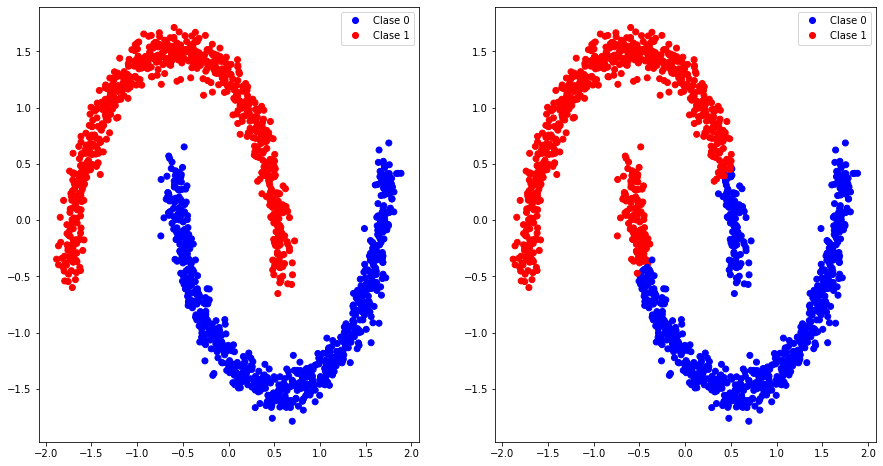

In [5]:
#plot

fig, ax=plt.subplots(1,2,figsize=(15,8))
colors=np.array(['blue', 'red'])
legend_e=[Line2D([0], [0], color=c, marker='o', linestyle='', label='Clase {}'.format(i)) for i,c in enumerate(colors)]

ax[0].scatter(X[:,0], X[:,1], color=colors[y1_pred]);
ax[0].legend(handles=legend_e, loc='upper right')

ax[1].scatter(X[:,0], X[:,1], color=colors[y2_pred]);
ax[1].legend(handles=legend_e, loc='upper right')

print ('Modelo 1: S_SCore={}'.format(silhouette_score(X, y1_pred)))
print ('Modelo 2: S_SCore={}'.format(silhouette_score(X, y2_pred)))

# Elbow

In [6]:
from IPython.display import set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D
set_matplotlib_formats('svg')

from sklearn.datasets import make_blobs

In [7]:
X,y=make_blobs(n_features=3, centers=2)

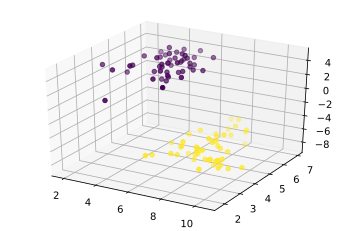

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y);

In [9]:
from sklearn.cluster import KMeans

n_clusters, inercia=zip(*[(k, KMeans(n_clusters=k).fit(X).inertia_) for k in range(1,10)])

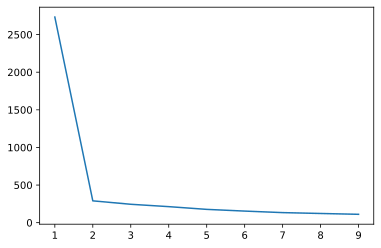

In [10]:
fig=plt.figure()
ax=fig.add_subplot()
ax.plot(n_clusters, inercia);

In [11]:
inercia

(2733.303494820087,
 290.20138119875594,
 244.6592276747827,
 213.19135821090168,
 176.8737686890023,
 154.167601429798,
 133.8205227966638,
 122.306241282337,
 111.26492276532633)

In [12]:
from yellowbrick.cluster import KElbowVisualizer

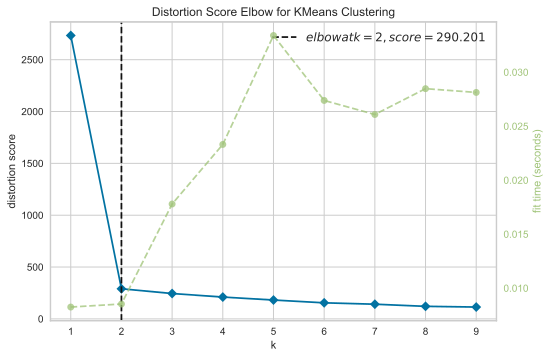

In [13]:
modelo=KMeans()
visual=KElbowVisualizer(modelo, k=(1,10))
visual.fit(X)
visual.poof();

In [14]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

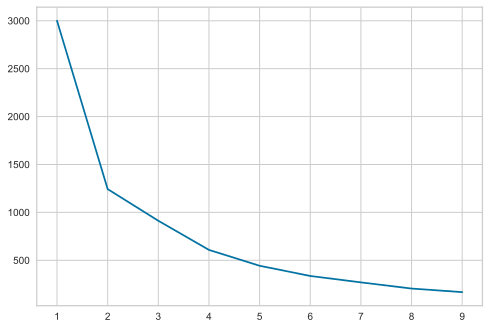

In [15]:
inercias=[]

for i in range(1,10):
    kmeans=KMeans(n_clusters=i).fit(X)
    inercias.append(kmeans.inertia_)
plt.plot(range(1,10), inercias);

# Rand Score

In [16]:
X,y=datasets.make_moons(n_samples=1500, noise=.05)
X=StandardScaler().fit_transform(X)

single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)
y1_pred=single.labels_

kmeans=cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y2_pred=kmeans.predict(X)

In [17]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [18]:
from sklearn.metrics import adjusted_rand_score as ars

score1=ars(y, y1_pred)
score2=ars(y, y2_pred)

print(score1, score2)

1.0 0.4822163885137481


# Visualizacion de clusters

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [20]:
X,_=make_blobs(n_samples=1500, centers=4, cluster_std=1.5)

In [21]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y_pred=kmeans.predict(X)

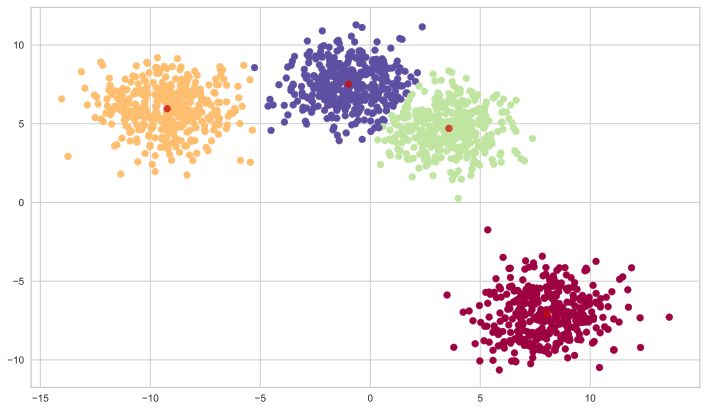

In [23]:
plt.figure(figsize=(12,7))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='Spectral');

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='r', s=50, alpha=.75);

plt.show();

In [24]:
# otro y PCA

from scipy.spatial.transform import Rotation as R

In [25]:
X,_=make_blobs(n_samples=500, n_features=2 ,centers=3, cluster_std=1.)

X=np.c_[X, .5*np.random.randn(X.shape[0], 1)]

rot=R.from_euler('y', 45, degrees=True)

X=rot.apply(X)

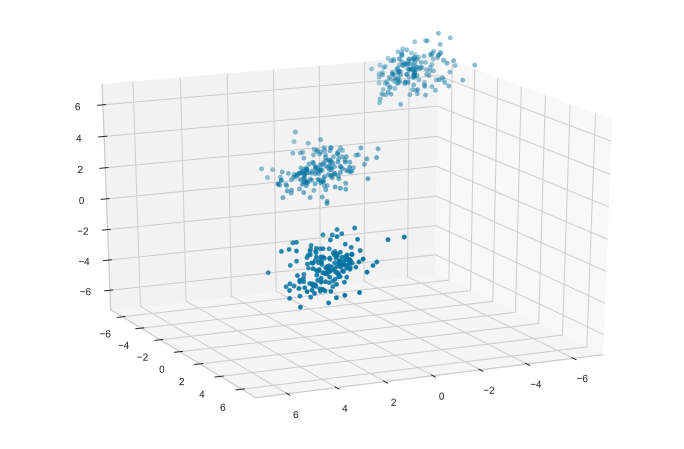

In [26]:
fig=plt.figure(figsize=(12,8))
ax=fig.gca(projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_zlim(-7,7)

ax.view_init(elev=20, azim=65)
plt.show();

In [27]:
from sklearn.decomposition import PCA

pca=PCA().fit(X)
pca_x=pca.transform(X)

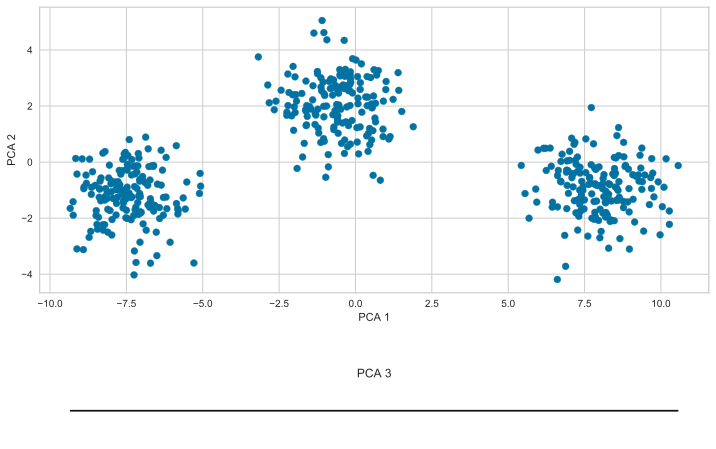

In [28]:
fig=plt.figure(figsize=(12,8))
ax=[plt.subplot2grid((6,1), (0,0), rowspan=4), plt.subplot2grid((6,1), (5,0))]

ax[0].scatter(pca_x[:,0], pca_x[:,1])
ax[0].set_xlabel('PCA 1')
ax[0].set_ylabel('PCA 2')

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)

y=np.ones(X.shape[0])

ax[1].plot(pca_x[:,2], y, '|', ms='20')
ax[1].axis('off')

plt.show();

In [29]:
# T-SNE

from sklearn.manifold import TSNE

X,y=datasets.load_iris(return_X_y=True)

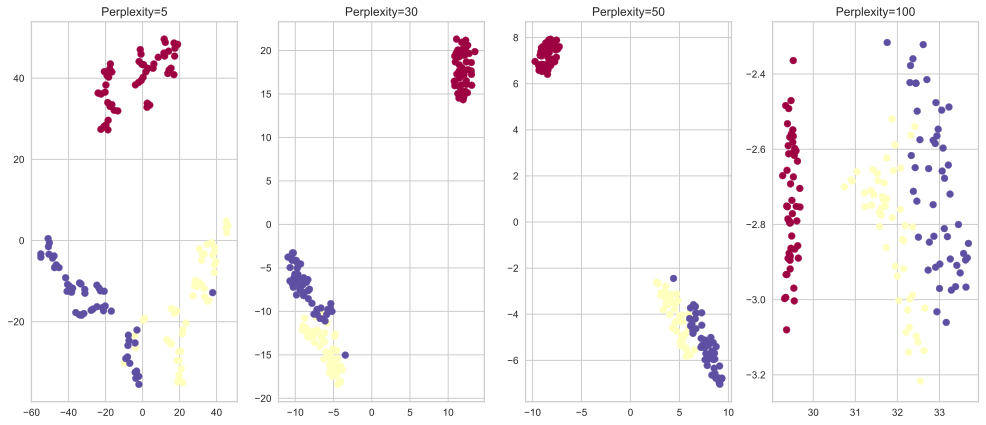

In [30]:
fig, ax=plt.subplots(1, 4, figsize=(17,7))

for i, p in enumerate([5, 30, 50, 100]):
    tsne=TSNE(perplexity=p)
    x_emb=tsne.fit_transform(X)
    ax[i].scatter(x_emb[:,0], x_emb[:,1], c=y, cmap='Spectral')
    ax[i].set_title('Perplexity={}'.format(p))
    
plt.show();

# UMAP (MNIST)

In [31]:
from umap import UMAP

import warnings
warnings.simplefilter('ignore')

import pandas as pd

In [32]:
digitos=datasets.load_digits()
digitos.data.shape

(1797, 64)

In [33]:
digitos.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
def get_umap(data, n):
    umap=UMAP(n_components=n)
    emb=umap.fit_transform(data)
    
    return pd.DataFrame(emb, columns=[f'emb_{i+1}' for i in range(n)])

In [35]:
umap_df=get_umap(digitos.data, 2)
umap_df.head()

,emb_1,emb_2
0,16.914114,1.803504
1,-6.737838,4.039165
2,-4.339570,1.202120
3,-1.034995,-0.816800
4,4.594946,11.819853


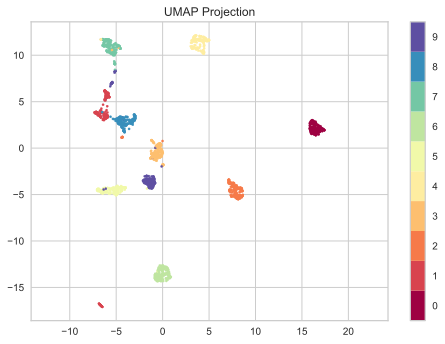

In [36]:
plt.scatter(umap_df.emb_1, umap_df.emb_2, c=digitos.target, cmap='Spectral', s=5);
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-.5).set_ticks(np.arange(10))
plt.title('UMAP Projection')
plt.show();

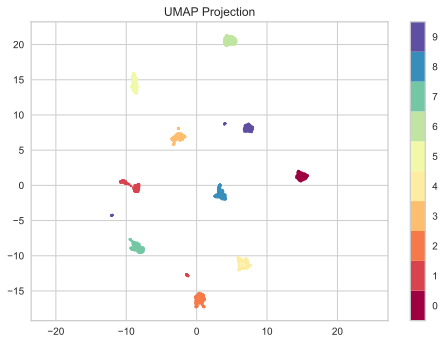

In [37]:
# clusterizacion supervisada

emb=UMAP().fit_transform(digitos.data, y=digitos.target)
umap_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])

plt.scatter(umap_df.emb_1, umap_df.emb_2, c=digitos.target, cmap='Spectral', s=5);
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-.5).set_ticks(np.arange(10))
plt.title('UMAP Projection')
plt.show();

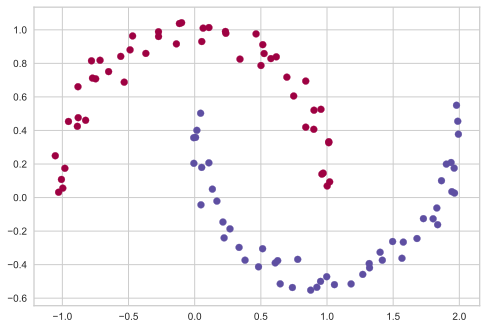

In [38]:
# UMAP in MOONS

X,y=datasets.make_moons(n_samples=100, shuffle=True ,noise=.05)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Spectral');

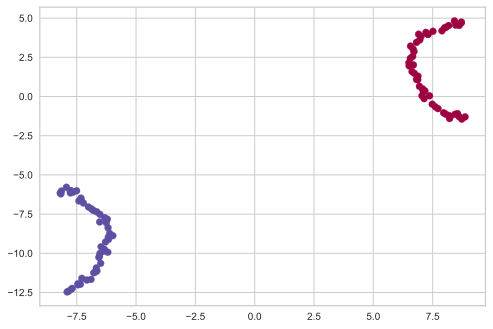

In [39]:
umap_df=get_umap(X, 2)
plt.scatter(umap_df.emb_1, umap_df.emb_2, c=y, cmap='Spectral');

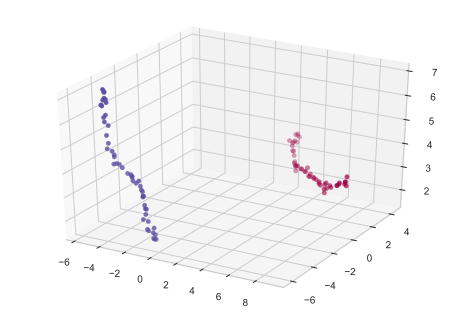

In [40]:
umap_df=get_umap(X, 3)
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3, c=y, cmap='Spectral');

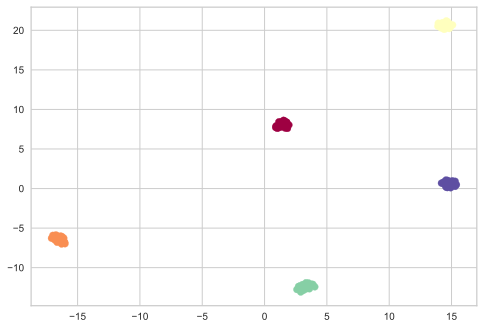

In [41]:
# UMAP in BLOBS

X,y=datasets.make_blobs(n_features=8, centers=5)
umap_df=get_umap(X,2)
plt.scatter(umap_df.emb_1, umap_df.emb_2, c=y, cmap='Spectral');

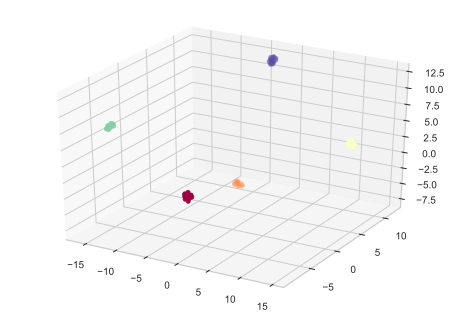

In [42]:
umap_df=get_umap(X, 3)
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3, c=y, cmap='Spectral');

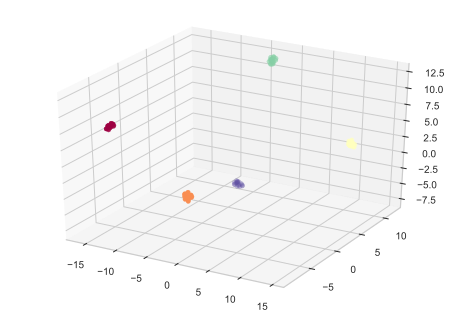

In [43]:
from hdbscan import HDBSCAN

hdbscan=HDBSCAN()
pred=hdbscan.fit_predict(umap_df)

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')

ax.scatter(umap_df.emb_1, umap_df.emb_2, umap_df.emb_3, c=pred, cmap='Spectral');

In [44]:
ars(y, pred)

1.0